In [2]:
import numpy as np 
import pandas as pd 
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Michael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
import nltk


with open('Dan Coats.txt', 'r+') as in_file:
    textDan = in_file.read()
    sentsDan = nltk.sent_tokenize(textDan)
    
pdDan = pd.DataFrame({'sentence':sentsDan})
pdDan['author'] = 'Dan Coats'


with open('James Mattis.txt', 'r+') as in_file:
    textMattis = in_file.read()
    sentsMattis = nltk.sent_tokenize(textMattis)
    
pdMattis = pd.DataFrame({'sentence':sentsMattis})
pdMattis['author'] = 'James Mattis'


with open('John Kelly.txt', 'r+') as in_file:
    textKelly = in_file.read()
    sentsKelly = nltk.sent_tokenize(textKelly)
    
pdKelly = pd.DataFrame({'sentence':sentsKelly})
pdKelly['author'] = 'John Kelly'


with open('Kevin Hassett.txt', 'r+') as in_file:
    textHassett = in_file.read()
    sentsHassett = nltk.sent_tokenize(textHassett)
    
pdHassett = pd.DataFrame({'sentence':sentsHassett})
pdHassett['author'] = 'Kevin Hassett'

with open('Kirstjen Nielsen.txt', 'r+') as in_file:
    textNielsen = in_file.read()
    sentsNielsen = nltk.sent_tokenize(textNielsen)
    
pdNielsen = pd.DataFrame({'sentence':sentsNielsen})
pdNielsen['author'] = 'Kirstjen Nielsen'

with open('Larry Kudlow.txt', 'r+') as in_file:
    textKudlow = in_file.read()
    sentsKudlow = nltk.sent_tokenize(textKudlow)
    
pdKudlow = pd.DataFrame({'sentence':sentsKudlow})
pdKudlow['author'] = 'Larry Kudlow'


with open('Mike Pence.txt', 'r+') as in_file:
    textPence = in_file.read()
    sentsPence = nltk.sent_tokenize(textPence)
    
pdPence = pd.DataFrame({'sentence':sentsPence})
pdPence['author'] = 'Mike Pence'

with open('Mike Pompeo.txt', 'r+') as in_file:
    textPompeo = in_file.read()
    sentsPompeo = nltk.sent_tokenize(textPompeo)
    
pdPompeo = pd.DataFrame({'sentence':sentsPompeo})
pdPompeo['author'] = 'Mike Pompeo'



train = pd.DataFrame()
train = pd.concat([pdDan, pdMattis,pdKelly,pdHassett,pdNielsen,pdKudlow,pdPence,pdPompeo])
train.head()

,sentence,author
0,"\nGood evening, and sincere thanks to the Atla...",Dan Coats
1,I enjoyed catching up with Atlantic council bo...,Dan Coats
2,Jeff Gedmin and I were also able to spend a fe...,Dan Coats
3,Last but certainly not least I would like to ...,Dan Coats
4,Ambassador to France and my close friend Craig...,Dan Coats


In [2]:

Coats = pd.read_table("Dan Coats.txt", header =None)
Coats.columns = ['text']
Coats['author'] = 'Dan Coats'

Mattis = pd.read_table("James Mattis.txt", header =None)
Mattis.columns = ['text']
Mattis['author'] = 'James Mattis'

Kelly = pd.read_table("John Kelly.txt", header =None)
Kelly.columns = ['text']
Kelly['author'] = 'John Kelly'

Hassett = pd.read_table("Kevin Hassett.txt", header =None)
Hassett.columns = ['text']
Hassett['author'] = 'Kevin Hassett'

Nielsen = pd.read_table("Kirstjen Nielsen.txt", header =None)
Nielsen.columns = ['text']
Nielsen['author'] = 'Kirstjen Nielsen'

Kudlow = pd.read_table("Larry Kudlow.txt", header =None)
Kudlow.columns = ['text']
Kudlow['author'] = 'Larry Kudlow'

Pence = pd.read_table("Mike Pence.txt", header =None)
Pence.columns = ['text']
Pence['author'] = 'Mike Pence'

Pompeo = pd.read_table("Mike Pompeo.txt", header =None)
Pompeo.columns = ['text']
Pompeo['author'] = 'Mike Pompeo'

In [5]:
#train = pd.DataFrame()
#train = pd.concat([Coats, Mattis,Kelly,Hassett,Nielsen,Kudlow,Pence,Pompeo])
#train.drop(train.columns[[0]], axis=1)

# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)


In [6]:
print(train)

                                              sentence       author
0    \nGood evening, and sincere thanks to the Atla...    Dan Coats
1    I enjoyed catching up with Atlantic council bo...    Dan Coats
2    Jeff Gedmin and I were also able to spend a fe...    Dan Coats
3    Last but certainly not least I would like to  ...    Dan Coats
4    Ambassador to France and my close friend Craig...    Dan Coats
5    Craig, a member of the board of directors for ...    Dan Coats
6    So if you don’t like or agree with my remarks ...    Dan Coats
7    There is no better venue to address the issue ...    Dan Coats
8    Duty prevented me from attending the D-Day cer...    Dan Coats
9    It was on this ground, in those uncertain days...    Dan Coats
10   And a century before that, Normandy was home t...    Dan Coats
11   The writings of Alexis De Tocqueville and the ...    Dan Coats
12   As a stranger in a strange land, his insights ...    Dan Coats
13   For the rest of the world—including his fel

In [9]:
# I want to remove punctuation from the text for word counting purposes
import string
no_punct_translator=str.maketrans('','',string.punctuation)

# tokenize each sentence and remove punctuation
train['words'] = train['sentence'].apply(lambda t: nltk.word_tokenize(t.translate(no_punct_translator).lower()))

In [10]:
train['word_count'] = train['words'].apply(lambda words: len(words))

# for normalization, how many characters per sentence w/o punctuation
train['sentence_length'] = train['words'].apply(lambda w: sum(map(len, w)))

# for future calculations, let's keep around the full text length, including punctuation
train['text_length'] = train['sentence'].apply(lambda t: len(t))




In [12]:
train.head()

,sentence,author,words,word_count,sentence_length,text_length
0,"\nGood evening, and sincere thanks to the Atla...",Dan Coats,"[good, evening, and, sincere, thanks, to, the,...",25,143,172
1,I enjoyed catching up with Atlantic council bo...,Dan Coats,"[i, enjoyed, catching, up, with, atlantic, cou...",32,160,191
2,Jeff Gedmin and I were also able to spend a fe...,Dan Coats,"[jeff, gedmin, and, i, were, also, able, to, s...",22,89,111
3,Last but certainly not least I would like to ...,Dan Coats,"[last, but, certainly, not, least, i, would, l...",12,55,69
4,Ambassador to France and my close friend Craig...,Dan Coats,"[ambassador, to, france, and, my, close, frien...",13,64,78


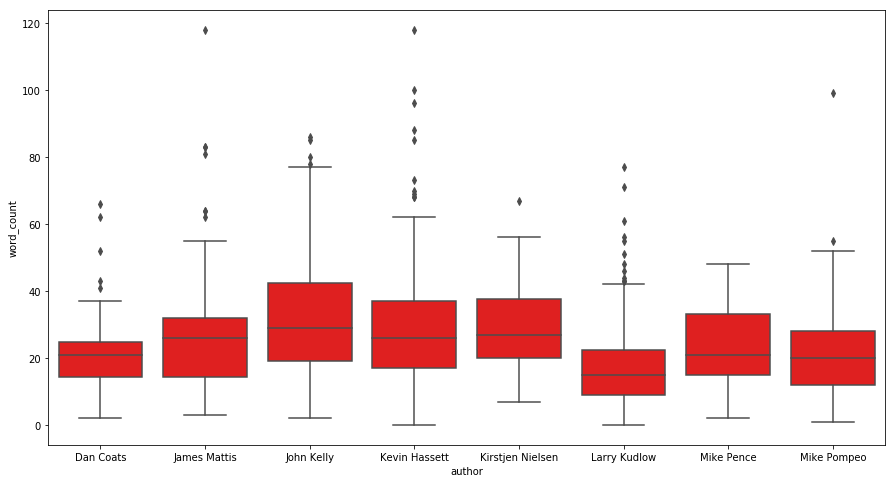

In [13]:

plt.figure(figsize=(15,8))
sns.boxplot(x = "author", y = "word_count", data=train, color = "red",)



In [14]:
train.groupby(['author'])['word_count'].describe()


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,20.845455,10.692694,2.0,14.25,21.0,24.75,66.0
James Mattis,98.0,27.642857,18.989552,3.0,14.25,26.0,32.00,118.0
John Kelly,191.0,32.041885,17.707813,2.0,19.00,29.0,42.50,86.0
Kevin Hassett,195.0,29.820513,19.152228,0.0,17.00,26.0,37.00,118.0
Kirstjen Nielsen,38.0,28.578947,13.500013,7.0,20.00,27.0,37.50,67.0
Larry Kudlow,196.0,17.448980,12.966325,0.0,9.00,15.0,22.25,77.0
Mike Pence,61.0,23.836066,11.823959,2.0,15.00,21.0,33.00,48.0
Mike Pompeo,180.0,21.111111,12.537715,1.0,12.00,20.0,28.00,99.0


In [15]:
train.groupby(['author'])['sentence_length'].describe()


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,102.018182,52.974632,8.0,70.25,97.5,125.50,330.0
James Mattis,98.0,122.204082,82.541831,10.0,67.25,108.5,144.75,516.0
John Kelly,191.0,158.905759,90.199554,8.0,94.00,145.0,219.00,413.0
Kevin Hassett,195.0,141.441026,88.402899,0.0,79.00,120.0,187.00,487.0
Kirstjen Nielsen,38.0,161.736842,78.351145,26.0,104.00,156.5,203.25,374.0
Larry Kudlow,196.0,79.811224,59.086812,0.0,39.75,67.0,106.25,363.0
Mike Pence,61.0,110.672131,56.694127,4.0,63.00,108.0,151.00,224.0
Mike Pompeo,180.0,97.244444,56.839736,4.0,55.75,94.0,135.25,423.0


In [16]:
# the string library defines `string.punctuation` which is all the punctuation chars
train['punctuation_count'] = train['sentence'].apply(lambda t: len(list(filter(lambda c: c in t, string.punctuation))))

train['punctuation_per_char'] = train['punctuation_count'] / train['text_length'] 

train.groupby(['author'])['punctuation_per_char'].describe()



,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,0.018266,0.014586,0.004938,0.009913,0.014286,0.020257,0.100000
James Mattis,98.0,0.018553,0.011100,0.004348,0.011413,0.015152,0.023211,0.076923
John Kelly,191.0,0.015167,0.012853,0.004115,0.008493,0.011364,0.016270,0.100000
Kevin Hassett,195.0,0.025077,0.099909,0.003279,0.009295,0.013423,0.017725,1.000000
Kirstjen Nielsen,38.0,0.014432,0.009120,0.005435,0.008362,0.011616,0.017827,0.045455
Larry Kudlow,196.0,0.069250,0.194735,0.004630,0.016097,0.023982,0.036532,1.000000
Mike Pence,61.0,0.022424,0.021543,0.005102,0.013072,0.017647,0.026042,0.166667
Mike Pompeo,180.0,0.022533,0.027406,0.003846,0.010178,0.013889,0.021452,0.200000


In [17]:
train = train[train.word_count != 0]
train['word_count'].min()

1

In [18]:
def unique_words(words):
    word_count = len(words)
    unique_count = len(set(words)) # creating a set from the list 'words' removes duplicates
    return unique_count / word_count

train['unique_ratio'] = train['words'].apply(unique_words)
train.groupby(['author'])['unique_ratio'].describe()



/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,0.916596,0.072731,0.730769,0.865119,0.928205,1.000000,1.0
James Mattis,98.0,0.910650,0.081966,0.687500,0.858374,0.914855,1.000000,1.0
John Kelly,191.0,0.875386,0.081289,0.661290,0.822876,0.868421,0.934409,1.0
Kevin Hassett,193.0,0.889783,0.090010,0.621622,0.826087,0.892857,0.962963,1.0
Kirstjen Nielsen,38.0,0.889317,0.084932,0.656716,0.822321,0.893797,0.954004,1.0
Larry Kudlow,188.0,0.943457,0.071154,0.721311,0.896098,0.987179,1.000000,1.0
Mike Pence,61.0,0.870039,0.091022,0.592593,0.812500,0.860465,0.928571,1.0
Mike Pompeo,180.0,0.920044,0.078391,0.694444,0.875000,0.927249,1.000000,1.0


Seems like the usage of unique words are about the same (90% of words are unique), though the distribution varies a bit. Let's graph the distribution of unique words for each author.

/Users/Michael/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


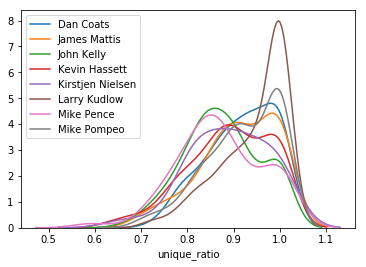

In [19]:
authors = ['Dan Coats', 'James Mattis', 'John Kelly','Kevin Hassett','Kirstjen Nielsen','Larry Kudlow',
          'Mike Pence','Mike Pompeo']

for author in authors:
    sns.distplot(train[train['author'] == author]['unique_ratio'], label = author, hist=False)

plt.legend();

In [20]:
# add up the length of each words and devide by the total number of words
avg_length = lambda words: sum(map(len, words)) / len(words)

train['avg_word_length'] = train['words'].apply(avg_length)
train.groupby(['author'])['avg_word_length'].describe()

/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,4.892550,0.802102,2.750000,4.367965,4.919872,5.382212,7.333333
James Mattis,98.0,4.505688,0.688550,2.769231,4.000000,4.473389,4.937799,6.583333
John Kelly,191.0,4.924996,0.827317,2.200000,4.385714,4.904762,5.364745,8.000000
Kevin Hassett,193.0,4.767678,0.628966,3.000000,4.406780,4.729730,5.116279,6.333333
Kirstjen Nielsen,38.0,5.643772,0.799627,3.714286,5.159004,5.591045,6.055556,7.409091
Larry Kudlow,188.0,4.556401,0.906041,2.000000,4.048370,4.533937,5.123518,8.000000
Mike Pence,61.0,4.621105,0.738467,2.000000,4.236842,4.500000,5.090909,7.000000
Mike Pompeo,180.0,4.612135,0.636881,2.857143,4.250000,4.575188,5.000000,6.333333


/Users/Michael/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


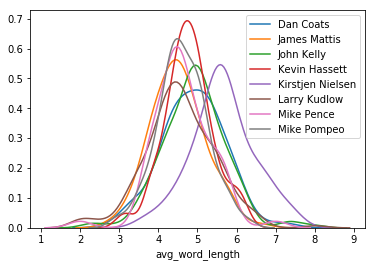

In [21]:
for author in authors:
    sns.distplot(train[train['author'] == author]['avg_word_length'], label = author, hist=False)

plt.legend();

Where we are now
We have broken down the text into lots of different features, some which might be useful to feed into a machine learning algorithm. Let's see what we have:

word_count: number of words in the average sentence
sentence_length: number of word characters in each sentence
text_length: pure number of characters, including spaces and punctuation
punctuation_per_char: how often an author uses punctuation marks per character written
unique_ration: ratio of unique words to total words
avg_word_length: how many characters is in the average word written

Sentiment Analysis - per author
 (http://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment.vader)

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

train['sentiment'] = train['sentence'].apply(lambda t: sid.polarity_scores(t)['compound'])
train.groupby('author')['sentiment'].describe()

/Users/Michael/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
Dan Coats,110.0,0.091159,0.454865,-0.9810,-0.198750,0.0000,0.453300,0.9042
James Mattis,98.0,0.053286,0.517038,-0.9460,-0.416600,0.0000,0.435675,0.9314
John Kelly,191.0,-0.079226,0.525874,-0.9413,-0.526150,0.0000,0.318200,0.9753
Kevin Hassett,193.0,0.164828,0.442772,-0.8405,-0.025800,0.1779,0.493900,0.9493
Kirstjen Nielsen,38.0,-0.372403,0.325855,-0.9246,-0.632925,-0.3506,-0.102700,0.1808
Larry Kudlow,188.0,0.140640,0.369857,-0.8580,0.000000,0.0000,0.401900,0.9300
Mike Pence,61.0,0.022346,0.477045,-0.9022,-0.345300,0.0000,0.440400,0.8555
Mike Pompeo,180.0,0.031846,0.520737,-0.9432,-0.481000,0.0000,0.440400,0.9815


/Users/Michael/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


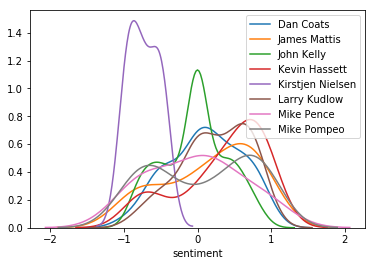

In [18]:
for author in authors:
    sns.distplot(train[train['author'] == author]['sentiment'], label = author, hist=False)

plt.legend();

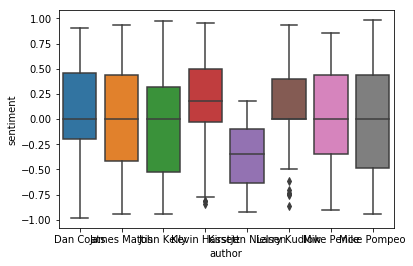

In [23]:
sns.boxplot(x="author", y="sentiment", data=train);


Word Frequency
I'd like to try to figure out if some authors have "favorite" words, which could help us determine which author wrote some specific piece of text.

I'm not sure the best way to go about this, but I have a few ideas:

Find the top N most commonly used words (for each author?), then score each text based on how frequently that word appears.
issue: we would want to strip out common pronounds, conjunctions and other parts of speach
issue: the ratio would probably be really close to zero so we'd want to normalize
Pick a part of speach, say verbs or adverbs, and see how often certain authors utilize some array of top words
issue: where would these words come from, should they just come from the whole training set?
Instead of specific words, we could see how often authors use certain parts of speech using nltk

In [24]:
# Let's start by figuring out the most common words in our word dataset

# iterate all rows and create a new dataframe with author->word (single word)
df_words = pd.concat([pd.DataFrame(data={'author': [row['author'] for _ in row['words']], 'word': row['words']})
           for _, row in train.iterrows()], ignore_index=True)

# use NLTK to remove all rows with simple stop words
df_words = df_words[~df_words['word'].isin(nltk.corpus.stopwords.words('english'))]

df_words.shape


(14577, 2)

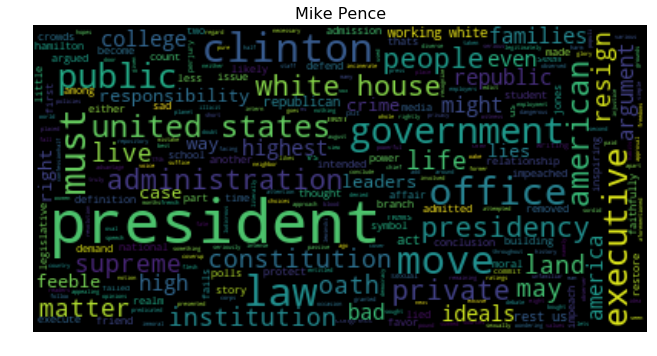

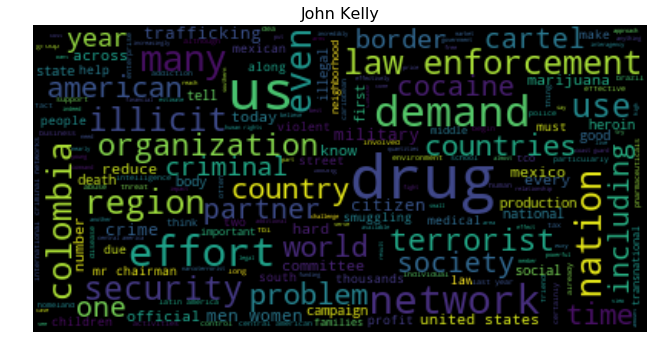

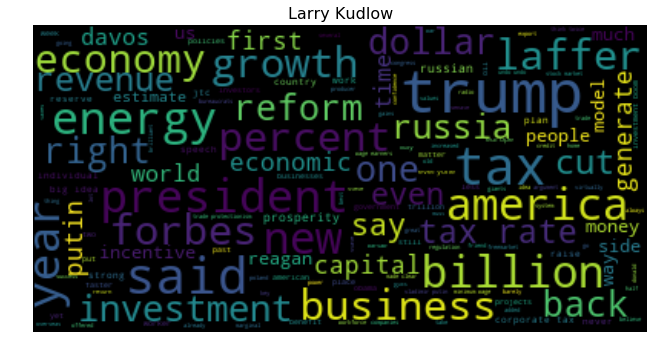

In [25]:
# let's use wordclouds to see which words each author likes to use
from wordcloud import WordCloud, STOPWORDS

def authorWordcloud(author):
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40,background_color="black", max_words=10000).generate(" ".join(df_words[df_words['author'] == author]['word'].values))
    plt.figure(figsize=(11,13))
    plt.title(author, fontsize=16)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    
authorWordcloud('Mike Pence')
authorWordcloud('John Kelly')
authorWordcloud('Larry Kudlow')

Now we have wordclouds for each author
We can tell already that they tend to favor certain words, and they often intersect in interesting ways. Now let's try to figure out the most commonly used words by each author

In [26]:
# function for a specific author to count occurances of each word
def authorCommonWords(author, numWords):
    authorWords = df_words[df_words['author'] == author].groupby('word').size().reset_index().rename(columns={0:'count'})
    authorWords.sort_values('count', inplace=True)
    return authorWords[-numWords:]

# for example, here's how we get the 10 most common EAP words.
authorCommonWords('Mike Pence', 10)
authorCommonWords('Larry Kudlow', 10)



,word,count
693,president,13
313,energy,13
489,investment,13
795,said,16
1008,—,17
933,trump,25
895,tax,31
1011,“,44
1012,”,44
1010,’,72


Utilizing An Author's Top Words
Now we can get a list of an author's top words, and there are probably lots of ways to use them. Our initial appoach will be make an indicator tensor (https://www.tensorflow.org/api_docs/python/tf/feature_column/indicator_column) for each possible top word and use it to indicate whether that example contains the given word. Then we'll let our ML algorithm figure out the scoring relationship by treating that column as categorical data.

In [27]:
# get all top words from our authors.
# this will represent our top words "vocabulary list"
authors_top_words = []
for author in authors:
    authors_top_words.extend(authorCommonWords(author, 10)['word'].values)

# use a set to remove duplicates
authors_top_words = list(set(authors_top_words))

In [28]:
train['top_words'] = train['words'].apply(lambda w: list(set(filter(set(w).__contains__, authors_top_words))))
train[['author','top_words', 'words']].head()



/Users/Michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,author,top_words,words
0,Dan Coats,"[tocqueville, democracy]","[good, evening, and, sincere, thanks, to, the,..."
1,Dan Coats,"[’, executive, president]","[i, enjoyed, catching, up, with, atlantic, cou..."
2,Dan Coats,"[–, also, us]","[jeff, gedmin, and, i, were, also, able, to, s..."
3,Dan Coats,[us],"[last, but, certainly, not, least, i, would, l..."
4,Dan Coats,[],"[ambassador, to, france, and, my, close, frien..."


Making an ML Model
Now that we have a lot of features, let's try to make our first ML model and see how it does. I'm going to use Tensorflow to make a Logistic Regression model using the estimator API.

Defining our features for Tensorflow
We have both continuous value columns, like words per sentence, and some categorical columns like top_words. Let's figure out which columns we want to use from our dataframe and then define the feature columns.

In [29]:
# First, let's just pull out the columns we need
# feature_columns = ['author', 'word_count', 'text_length', 'punctuation_per_char', 'unique_ratio', 'avg_word_length', 'sentiment', 'top_words']
# TODO: put back in top_words once we figure it out
feature_columns = ['author', 'word_count', 'text_length', 'punctuation_per_char', 'unique_ratio', 'avg_word_length', 'sentiment']
df_features = train[feature_columns]

# Now let's split into a train and dev set
# use random_state seed so we get the same split each time
df_train=df_features.sample(frac=0.8,random_state=1)
df_dev=df_features.drop(df_train.index)

df_train.head()

,author,word_count,text_length,punctuation_per_char,unique_ratio,avg_word_length,sentiment
7,John Kelly,55,341,0.005865,0.727273,5.000000,0.0000
33,Larry Kudlow,31,183,0.027322,0.967742,4.806452,0.4939
151,Larry Kudlow,13,73,0.027397,0.923077,4.538462,0.6486
176,Larry Kudlow,6,41,0.048780,1.000000,5.666667,0.0000
37,Kirstjen Nielsen,56,364,0.008242,0.785714,5.428571,-0.3612


In [30]:
import tensorflow as tf


/Users/Michael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [31]:
# continual numeric features
feature_word_count = tf.feature_column.numeric_column("word_count")
feature_text_length = tf.feature_column.numeric_column("text_length")
feature_punctuation_per_char = tf.feature_column.numeric_column("punctuation_per_char")
feature_unique_ratio = tf.feature_column.numeric_column("unique_ratio")
feature_avg_word_length = tf.feature_column.numeric_column("avg_word_length")
feature_sentiment = tf.feature_column.numeric_column("sentiment")


base_columns = [
    feature_word_count, feature_text_length, feature_punctuation_per_char, feature_unique_ratio, feature_avg_word_length, feature_sentiment
]


In [32]:
import tempfile

model_dir = tempfile.mkdtemp() # base temp directory for running models

# our Y value labels, i.e. the thing we are classifying
labels_train = df_train['author']

# let's make a training function we can use with our estimators
train_fn = tf.estimator.inputs.pandas_input_fn(
    x=df_train,
    y=labels_train,
    batch_size=100,
    num_epochs=None, # unlimited
    shuffle=True, # shuffle the training data around
    num_threads=5)

# let's try a simple linear classifier
linear_model = tf.estimator.LinearClassifier(
    model_dir=model_dir, 
    feature_columns=base_columns,
    n_classes=len(authors),
    label_vocabulary=authors)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vj/xsyxfhq96vn4tnxml49dtkww0000gn/T/tmpe_sspih3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a28a226d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
train_steps = 5000

# now let's train that model!
linear_model.train(input_fn=train_fn, steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/vj/xsyxfhq96vn4tnxml49dtkww0000gn/T/tmpe_sspih3/model.ckpt.
INFO:tensorflow:loss = 207.94412, step = 1
INFO:tensorflow:global_step/sec: 171.172
INFO:tensorflow:loss = 330.4383, step = 101 (0.584 sec)
INFO:tensorflow:global_step/sec: 194.582
INFO:tensorflow:loss = 232.98727, step = 201 (0.514 sec)
INFO:tensorflow:global_step/sec: 216.655
INFO:tensorflow:loss = 193.98505, step = 301 (0.461 sec)
INFO:tensorflow:global_step/sec: 254.908
INFO:tensorflow:loss = 195.64136, step = 401 (0.392 sec)
INFO:tensorflow:global_step/sec: 258.26
INFO:tensorflow:loss = 230.65121, step = 501 (0.387 sec)
INFO:tensorflow:global_step/sec: 261.714
INFO:tensorflow:loss = 183.55045, step = 601 (0.382 sec)
INFO:tensorflow

In [35]:
print((linear_model))

In [33]:
# let's see how well we did on our training set
dev_test_fn = tf.estimator.inputs.pandas_input_fn(
    x=df_dev,
    y=df_dev['author'],
    batch_size=100,
    num_epochs=1, # just one run
    shuffle=False, # don't shuffle test here
    num_threads=5)

linear_model.evaluate(input_fn=dev_test_fn)



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-30-02:22:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vj/xsyxfhq96vn4tnxml49dtkww0000gn/T/tmpghgroshs/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-30-02:22:20
INFO:tensorflow:Saving dict for global step 5000: accuracy = 1.0, average_loss = 0.18673974, global_step = 5000, loss = 15.172605


{'accuracy': 1.0,
 'average_loss': 0.18673974,
 'global_step': 5000,
 'loss': 15.172605}

In [34]:
#Test the Model


opEd = pd.read_table("OpEd.txt", header =None)
opEd.columns = ['text']

# I want to remove punctuation from the text for word counting purposes
import string
no_punct_translator=str.maketrans('','',string.punctuation)

# tokenize each sentence and remove punctuation
opEd['words'] = opEd['text'].apply(lambda t: nltk.word_tokenize(t.translate(no_punct_translator).lower()))
opEd['word_count'] = opEd['words'].apply(lambda words: len(words))

# for normalization, how many characters per sentence w/o punctuation
opEd['sentence_length'] = opEd['words'].apply(lambda w: sum(map(len, w)))

# for future calculations, let's keep around the full text length, including punctuation
opEd['text_length'] = opEd['text'].apply(lambda t: len(t))
# the string library defines `string.punctuation` which is all the punctuation chars
opEd['punctuation_count'] = opEd['text'].apply(lambda t: len(list(filter(lambda c: c in t, string.punctuation))))

opEd['punctuation_per_char'] = opEd['punctuation_count'] / opEd['text_length'] 
opEd['unique_ratio'] = opEd['words'].apply(unique_words)
opEd['avg_word_length'] = opEd['words'].apply(avg_length)
sid = SentimentIntensityAnalyzer()

opEd['sentiment'] = opEd['text'].apply(lambda t: sid.polarity_scores(t)['compound'])


opEd.head()


,text,words,word_count,sentence_length,text_length,punctuation_count,punctuation_per_char,unique_ratio,avg_word_length,sentiment
0,I Am Part of the Resistance Inside the Trump A...,"[i, am, part, of, the, resistance, inside, the...",10,50,59,0,0.000000,0.900000,5.000000,0.0000
1,I work for the president but like-minded colle...,"[i, work, for, the, president, but, likeminded...",22,103,126,2,0.015873,0.863636,4.681818,-0.7684
2,President Trump is facing a test to his presid...,"[president, trump, is, facing, a, test, to, hi...",17,79,96,1,0.010417,0.941176,4.647059,0.0000
3,It’s not just that the special counsel looms l...,"[it, ’, s, not, just, that, the, special, coun...",41,172,212,1,0.004717,0.804878,4.195122,0.0516
4,The dilemma — which he does not fully grasp — ...,"[the, dilemma, —, which, he, does, not, fully,...",36,168,204,1,0.004902,0.861111,4.666667,-0.8316


In [35]:
feature_columns = ['word_count', 'text_length', 'punctuation_per_char', 'unique_ratio', 'avg_word_length', 'sentiment']
testFeatures = opEd[feature_columns]

# continual numeric features
feature_word_count = tf.feature_column.numeric_column("word_count")
feature_text_length = tf.feature_column.numeric_column("text_length")
feature_punctuation_per_char = tf.feature_column.numeric_column("punctuation_per_char")
feature_unique_ratio = tf.feature_column.numeric_column("unique_ratio")
feature_avg_word_length = tf.feature_column.numeric_column("avg_word_length")
feature_sentiment = tf.feature_column.numeric_column("sentiment")


base_columns = [
    feature_word_count, feature_text_length, feature_punctuation_per_char, feature_unique_ratio, feature_avg_word_length, feature_sentiment
]

In [36]:
testFeatures.shape

(27, 6)

In [37]:
test_fn = tf.estimator.inputs.pandas_input_fn(
    x=testFeatures,
    batch_size=27,
    num_epochs=100, # unlimited
    shuffle=True, # shuffle the training data around
    num_threads=5)
predictions = linear_model.predict(input_fn=test_fn)



#print(linear_model.predict(input_fn=test_fn))

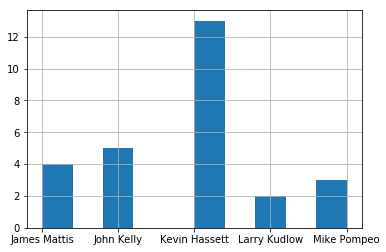

In [39]:

x = [predictions.__next__()['classes'] for i in range(27)]

g = []
for i in x:
    g.append(i[0].decode('utf-8'))

   
predictionSeries = pd.Series(g)
predictionSeries.hist()




In [115]:
[predictions.__next__()['classes'] for i in range(1)]

[array([b'John Kelly'], dtype=object)]